##Imports

In [29]:
import numpy as np
import matplotlib.pyplot as plt

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import  Dense, Conv2D, MaxPool2D, Flatten, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint

##Get the data

In [30]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
#X_train.shape, y_train.shape, X_test.shape, y_test.shape

In [31]:
def plot_input_img(i):
    plt.imshow(X_train[i], cmap='binary')
    plt.title(y_train[i])
    plt.show()

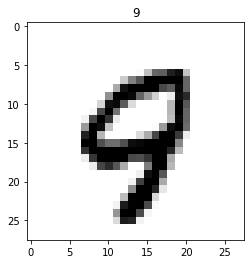

In [32]:
plt.imshow(X_train[42069], cmap='binary')
plt.title(y_train[42069])
plt.show()

##Pre-process the images

In [33]:
#Normalizing image to [0,1]
X_train = X_train.astype(np.float32)/255
X_test = X_test.astype(np.float32)/255

#Expand dmension of image to 28,28,1
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

#convert classes to one hot vectors
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

##Create model

In [34]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), input_shape=(28,28,1), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(64, kernel_size=(3,3), input_shape=(28,28,1), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))

#model.summary()

In [35]:
#Compile model
model.compile(optimizer='adam', loss = keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [39]:
#Callbacks
es = EarlyStopping(monitor='val_accuracy', min_delta=0.01, patience=4, verbose=1)

mc = ModelCheckpoint("./bestmodel.h5", monitor='val_accuracy', verbose=1, save_best_only=True)

cb = [es, mc]

##Model Training

In [40]:
his = model.fit(X_train, y_train, epochs=5, validation_split=0.3, callbacks=cb)

Epoch 1/5
1312/1313 [============================>.] - ETA: 0s - loss: 0.0317 - accuracy: 0.9895
Epoch 00001: val_accuracy improved from -inf to 0.98856, saving model to .\bestmodel.h5
1313/1313 [==============================] - 11s 8ms/step - loss: 0.0317 - accuracy: 0.9895 - val_loss: 0.0391 - val_accuracy: 0.9886
Epoch 2/5
1307/1313 [============================>.] - ETA: 0s - loss: 0.0258 - accuracy: 0.9914
Epoch 00002: val_accuracy did not improve from 0.98856
1313/1313 [==============================] - 11s 8ms/step - loss: 0.0259 - accuracy: 0.9913 - val_loss: 0.0408 - val_accuracy: 0.9884
Epoch 3/5
1312/1313 [============================>.] - ETA: 0s - loss: 0.0246 - accuracy: 0.9918
Epoch 00003: val_accuracy improved from 0.98856 to 0.98917, saving model to .\bestmodel.h5
1313/1313 [==============================] - 10s 8ms/step - loss: 0.0246 - accuracy: 0.9918 - val_loss: 0.0373 - val_accuracy: 0.9892
Epoch 4/5
1309/1313 [============================>.] - ETA: 0s - loss: 0.

In [42]:
model_S = keras.models.load_model("bestmodel.h5")
score = model_S.evaluate(X_test, y_test)
print(f"The model accuracy is {score[1]}")

313/313 [==============================] - 1s 2ms/step - loss: 0.0302 - accuracy: 0.9904
The model accuracy is 0.9904000163078308
